In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# sklearn library for machine learning
from sklearn.preprocessing import Normalizer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [7]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'marketing_customer_analysis.csv'

1. Seperate the data into 'Numerical' and 'Categorical' DataFrames

In [ ]:
data.dtypes

In [3]:
numerical = data.select_dtypes([np.number])
numerical.head()

NameError: name 'data' is not defined

In [4]:
categorical = data.select_dtypes([np.object_])
categorical.head()

NameError: name 'data' is not defined

2. Normality of the Numerical DF

In [5]:
sns.pairplot(numerical)
plt.show()

NameError: name 'numerical' is not defined

In [146]:
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

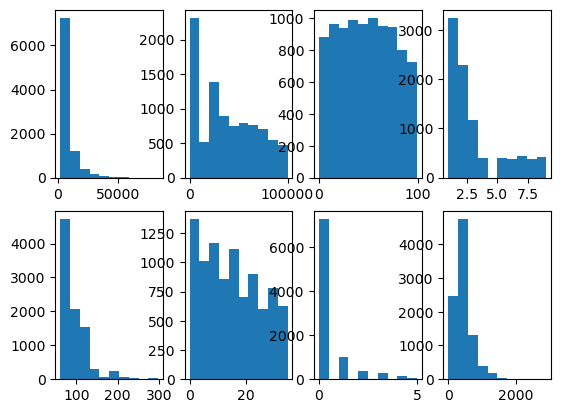

In [147]:
fig, axs = plt.subplots(2,4) # 2 is the number of rows , 4 is the number of columns

axs[0, 0].hist(numerical['Customer Lifetime Value'])
axs[0, 1].hist(numerical['Income'])
axs[1, 0].hist(numerical['Monthly Premium Auto'])
axs[1, 1].hist(numerical['Months Since Last Claim'])
axs[0, 2].hist(numerical['Months Since Policy Inception'])
axs[1, 2].hist(numerical['Number of Open Complaints'])
axs[0, 3].hist(numerical['Number of Policies'])
axs[1, 3].hist(numerical['Total Claim Amount'])

plt.show()
# Months Since Policy Inception and Income may look like a normal distribution

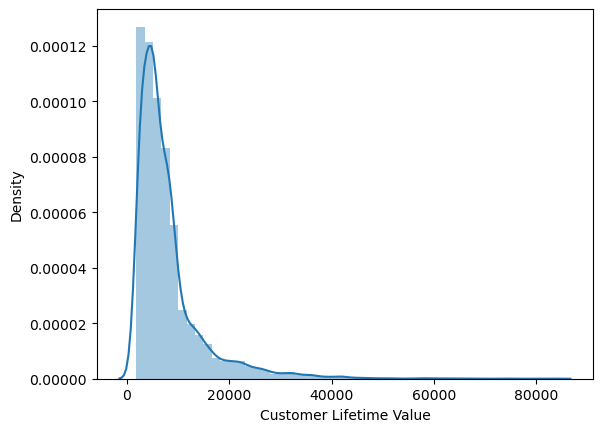

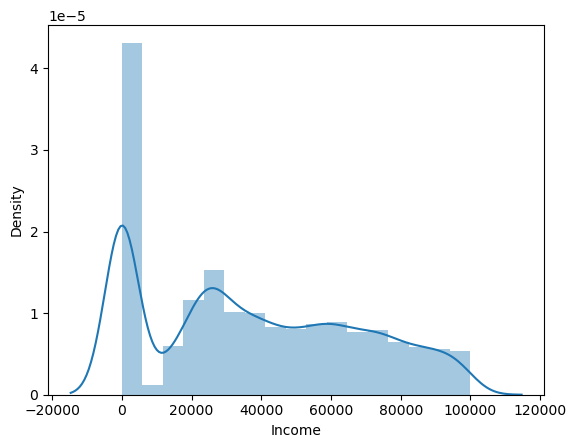

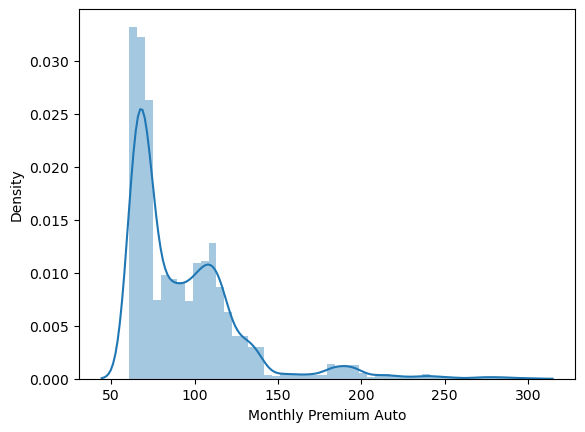

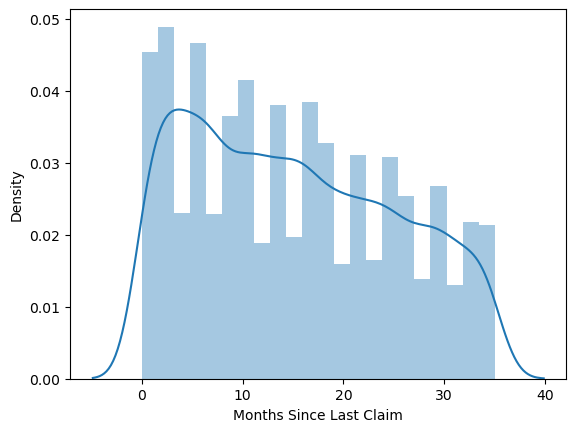

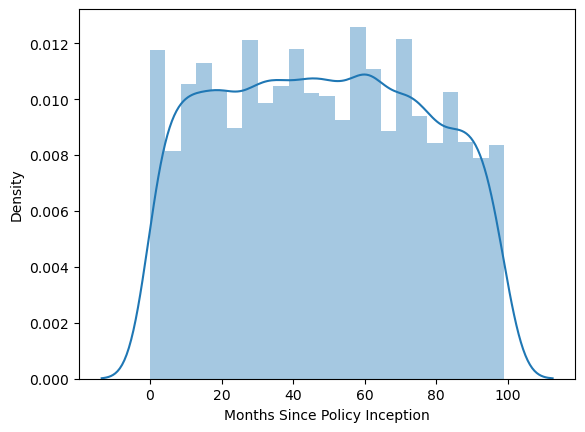

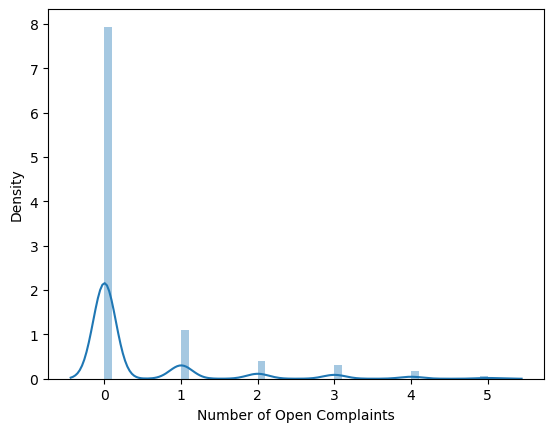

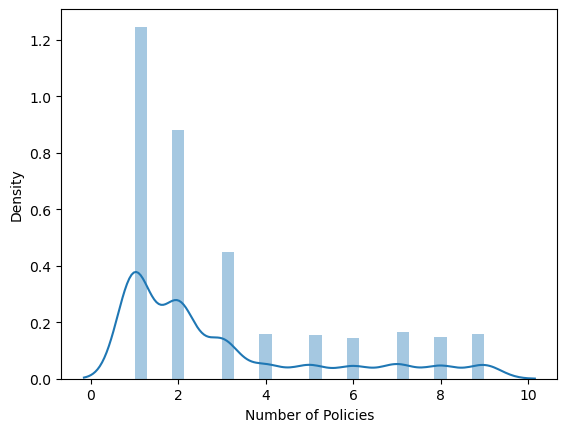

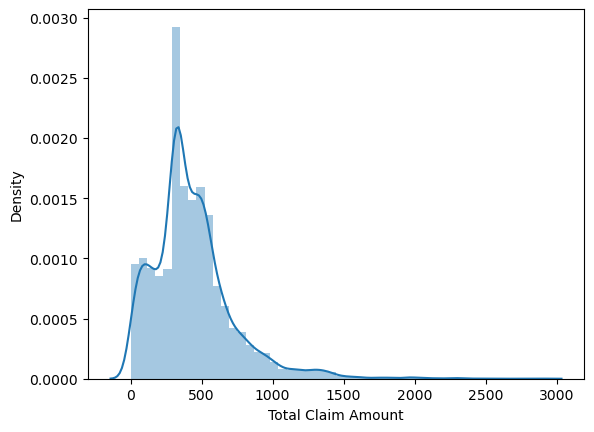

In [148]:
for column in numerical.columns:
    sns.distplot(numerical[column])

    plt.show()

3. Check the MultiCollinearity

In [149]:
num_matrix = numerical.corr()
num_matrix = round(num_matrix, 2)
num_matrix  

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
Income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
Monthly Premium Auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
Months Since Last Claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
Months Since Policy Inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
Number of Open Complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
Number of Policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
Total Claim Amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


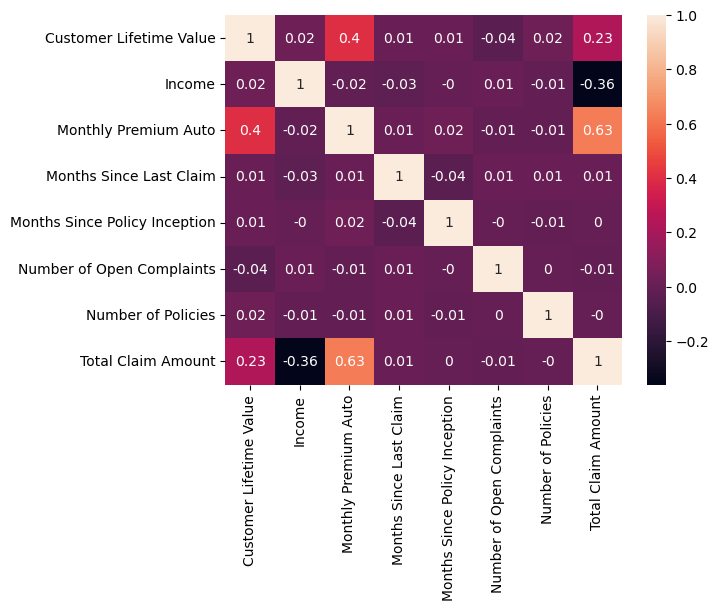

In [150]:
sns_plot = sns.heatmap(num_matrix, annot=True) 
sns_plot 

plt.show() #there is no high correlation between the observed columns

4. Processing Data 

In [225]:
#x-y split
numerical.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:>

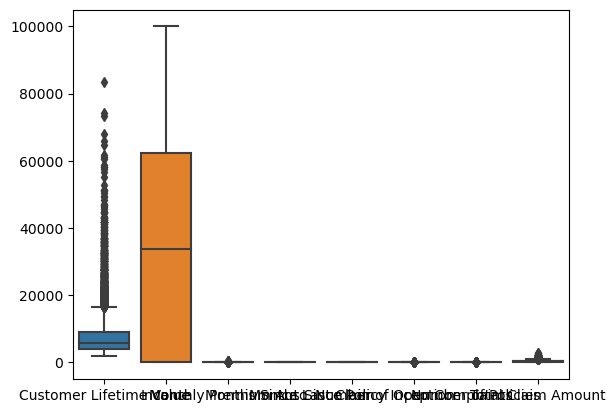

In [226]:
sns.boxplot(data=numerical)

- find iqr
- remove outliers
- drop 'Total Claim Amount'

In [227]:
# check and remove for outliers
#iqr = np.percentile(numerical['Customer Lifetime Value'],75) - np.percentile(numerical['Customer Lifetime Value'],25) 
#iqr

In [228]:
#upper_limit = np.percentile(numerical['Customer Lifetime Value'],75) + 1*iqr   #change "5" according to change the tails
#lower_limit = np.percentile(numerical['Customer Lifetime Value'],25) - 1*iqr
#upper_limit, lower_limit

In [229]:
#numerical.describe()

In [230]:
#data = numerical[(numerical['Customer Lifetime Value']>lower_limit) & (numerical['Customer Lifetime Value']<upper_limit)] #choose the data that is higher than the lower limit, but smaller than the upper limit
#data.head()

In [231]:
y = data['Total Claim Amount'] # variable we want to know
X = data.drop(['Total Claim Amount'], axis=1) # other variables
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [232]:
#normalize the data ; scale the data
x_trans = MinMaxScaler().fit(X) # syntax sets new maximum and minimum between 0 and 1
x_minmax = x_trans.transform(X) 
print(x_minmax.shape)

(8024, 7)


In [233]:
X_norm = pd.DataFrame(x_minmax,columns=X.columns) # create a new dataframe
X_norm.head() 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.072003,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.422738,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.914221,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.478170,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.076177,0.438443,0.050633,0.342857,0.444444,0.0,0.000
